In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

In [7]:
def fitFunc(t, a, b, c):
    return a*np.exp(-b*t) + c

In [8]:
t = np.linspace(0,4,50)
temp = fitFunc(t, 2.5, 1.3, 0.5)
noisy = temp + 0.25*np.random.normal(size=len(temp))

# None fixed 

[ 2.52895168  1.30331239  0.4883903 ]
[[ 0.02393006  0.00974128 -0.00128372]
 [ 0.00974128  0.02995835  0.00864365]
 [-0.00128372  0.00864365  0.00466038]]


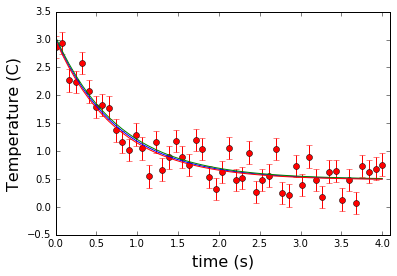

In [9]:
fitParams, fitCovariance = curve_fit(fitFunc, t, noisy)
print(fitParams)
print(fitCovariance)

plt.ylabel('Temperature (C)', fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.xlim(0,4.1)
# plot the data as red circles with vertical errorbars
plt.errorbar(t, noisy, fmt = 'ro', yerr = 0.2)
# now plot the best fit curve and also +- 1 sigma curves
# (the square root of the diagonal covariance matrix  
# element is the uncertianty on the fit parameter.)
sigma = [fitCovariance[0,0], \
         fitCovariance[1,1], \
         fitCovariance[2,2] \
         ]
plt.plot(t, fitFunc(t, fitParams[0], fitParams[1], fitParams[2]),\
         t, fitFunc(t, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2]),\
         t, fitFunc(t, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2]))

# a fixed 

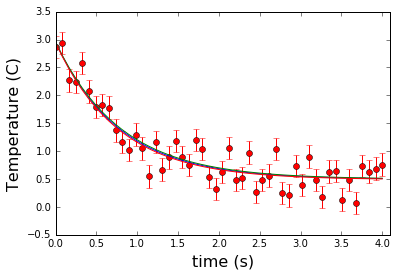

In [10]:
my_lambda = lambda t, b, c : fitFunc(t, a, b, c)

a = 2.4576982
popt, pcov = curve_fit(my_lambda, t, noisy)
#popt, pcov = curve_fit(my_lambda, t, noisy)

plt.ylabel('Temperature (C)', fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.xlim(0,4.1)
# plot the data as red circles with vertical errorbars
plt.errorbar(t, noisy, fmt = 'ro', yerr = 0.2)

sigma = [pcov[0,0], \
         pcov[1,1]]

plt.plot(t, my_lambda(t, popt[0], popt[1]),\
         t, my_lambda(t, popt[0] - sigma[0], popt[1] + sigma[1]),\
         t, my_lambda(t, popt[0] + sigma[0], popt[1] - sigma[1]))



# a and b fixed 

In [23]:
def my_function(t, d_spacing, alpha, sigma, a1, a2, a5, a6):
    return t*(d_spacing+alpha+sigma+a1+a2+a5+a6)

In [24]:
from lmfit import Model
gmodel = Model(my_function)

In [25]:
gmodel.param_names

['d_spacing', 'alpha', 'sigma', 'a1', 'a2', 'a5', 'a6']

In [26]:
gmodel.independent_vars

['t']

In [27]:
params = gmodel.make_params()

In [28]:
params.add('d_spacing', value=5, vary=False)
params.add('alpha', value=1, vary=False)
params.add('sigma', value=2, vary=False)
params.add('a1', value=10)
params.add('a6', value=20)
params.add('a5', value=2, vary=False)
params.add('a2', value=1, vary=False)

In [29]:
result = gmodel.fit(noisy, params, t=t)

In [30]:
print(result.fit_report())

[[Model]]
    Model(my_function)
[[Variables]]
    d_spacing:   5 (fixed)
    alpha:       1 (fixed)
    sigma:       2 (fixed)
    a1:          1571.02510 +/- 0        (0.00%) (init= 10)
    a2:          1 (fixed)
    a5:          2 (fixed)
    a6:         -1581.77770 +/- 0        (0.00%) (init= 20)



In [31]:
#print(result.var_names)
#print(result.params)
#print(result.data)


In [32]:
result.params.valuesdict()

OrderedDict([('d_spacing', 5),
             ('alpha', 1),
             ('sigma', 2),
             ('a1', 1571.0251052621797),
             ('a2', 1),
             ('a5', 2),
             ('a6', -1581.7777074503081)])

In [33]:
result.params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
a1             1571     -inf      inf        0     True     None     None
a2                1     -inf      inf        0    False     None     None
a5                2     -inf      inf        0    False     None     None
a6            -1582     -inf      inf        0     True     None     None
alpha             1     -inf      inf        0    False     None     None
d_spacing         5     -inf      inf        0    False     None     None
sigma             2     -inf      inf        0    False     None     None


In [34]:
result.params.pretty_print(columns=['stderr'])

Name         Stderr
a1                0
a2                0
a5                0
a6                0
alpha             0
d_spacing         0
sigma             0


In [35]:
result.params['a1'].value

1571.0251052621797

## here is the way to retrieve the stderr

In [20]:
step1= result.params['a1']

In [22]:
step1.value

1571.0251052621797

In [21]:
step1.stderr

0

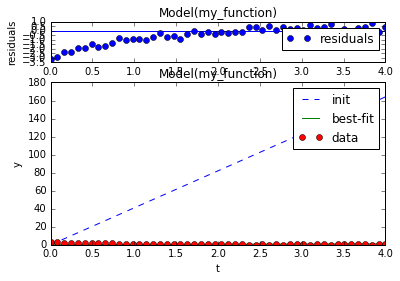

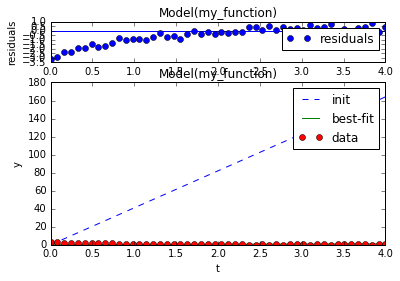

In [66]:
result.plot()